In [31]:
!pip install grpcio==1.59.0
!pip install tensorflow==2.18.0
!pip install matplotlib

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [33]:
if not tf.__version__ == '2.18.0':
    print(tf.__version__)
    raise ValueError('Please upgrade to TensorFlow 2.18.0, or restart your Kernel (Kernel->Restart & Clear Output)')

In [34]:
X = np.arange(0.0,5.0,0.1)
tf.print(X)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])


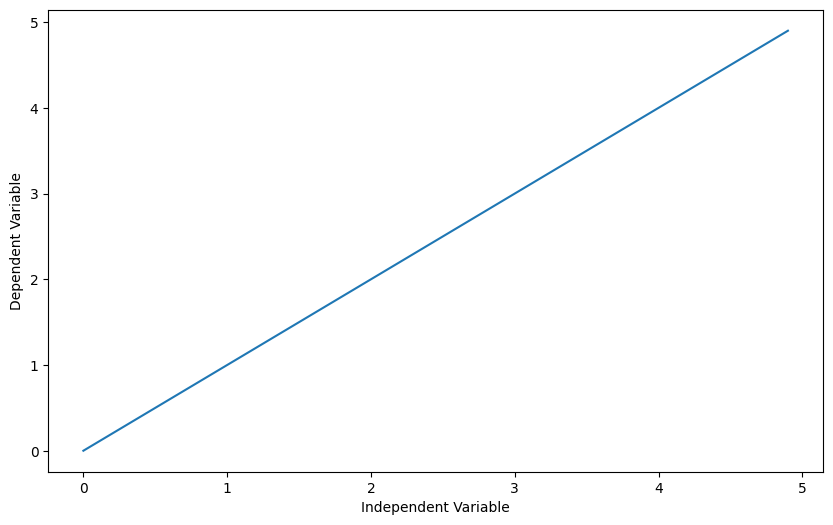

None


In [35]:
##You can adjust the slope and intercept to verify the changes in the graph

a = 1
b = 0

Y = a*X + b

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
tf.print(plt.show())

In [36]:
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"

In [70]:
df = pd.read_csv(url)

# Show the first few rows
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


DATA PREPARATION

In [85]:
train_x = tf.convert_to_tensor(np.asarray(df[['ENGINESIZE']], dtype=np.float32))  # Corrected column name [Feature (input)]
train_y = tf.convert_to_tensor(np.asarray(df[['CO2EMISSIONS']], dtype=np.float32))  # Corrected column name [Target (output)]


Train_x: Extracts the Engine Size feature as the input for training.
Train_y: Extracts the corresponding CO2 Emissions as the target variable.

MODEL DEFINITION

In [86]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

a: The slope or coefficient of the linear regression line.
b: The bias or intercept, determining where the line crosses the y-axis

h(x): A function representing the linear regression equation 
𝑦 = 𝑎𝑥 + 𝑏
y=ax+b.
It returns predicted CO2 emissions based on engine size.

LOSS FUNCTION

In [87]:
def loss_object(y, train_y):
    return tf.reduce_mean(tf.square(y - train_y))

loss_object(y, train_y): Computes the Mean Squared Error (MSE) between predicted values y and actual values train_y.
The lower the MSE, the better the model.

TRAINING SETUP

In [88]:
learning_rate = 0.01
train_data = []
loss_value = []
training_epoches = 200

learning_rate: Controls the step size for updating weights.
train_data: Stores updated model parameters during training for visualization.
loss_values: Keeps track of the loss at each training step.
training_epochs: Number of passes through the entire dataset.

TRAINING LOOP (GRADIENT DESCENT):

In [89]:
#Train model

for epoch in range(training_epoches):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y, y_predicted)
        loss_values.append(loss_value)

        # Get Gradients
        gradient = tape.gradient(loss_value, [b,a])

        #compute and adjust weights
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])


Forward Pass: Computes the predicted values y_predicted using the linear function h(train_x).
Loss Calculation: Computes the Mean Squared Error (MSE).
Loss Tracking: Stores the loss in the list loss_values for later visualization.
Gradient Computation: Uses TensorFlow's GradientTape to calculate gradients of loss_value with respect to variables a and b.
assign_sub() subtracts the computed gradient from the current value of the variable.
This updates a and b using gradient descent.
Every 5 epochs, the updated values of a and b are stored in train_data for visualization or further analysis.

Summary of How It Works:
Initialize Parameters (a, b): Start with random values for the weight and bias.
Compute Predictions (h(x)): Use the linear function to predict CO2 emissions.
Calculate Loss: Compare predictions with actual values using MSE.
Compute Gradients: Find how much the loss changes with respect to a and b.
Update Parameters: Adjust a and b using the gradients and learning rate.
Repeat: Perform the above steps for 200 epochs

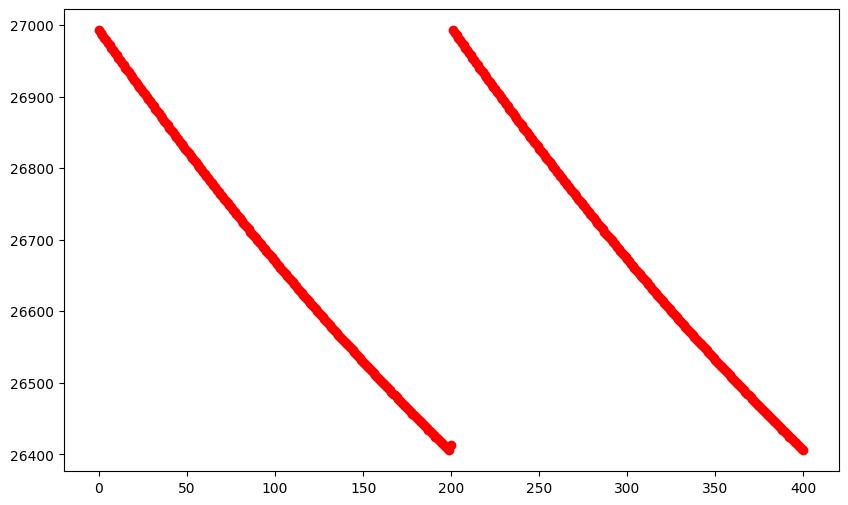

In [90]:
plt.plot(loss_values, 'ro')

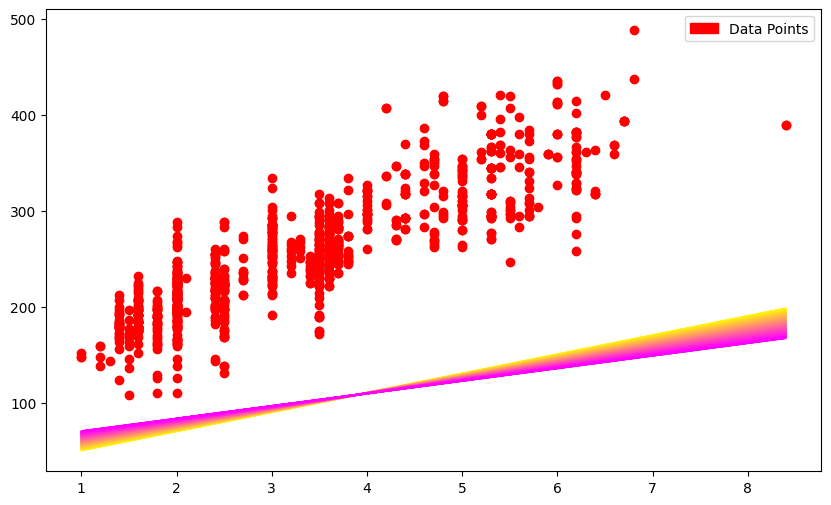

In [91]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')
green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()